# **1-Import libraries**

In [1]:
# Import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/retail-sales-analysis/Historical_Retail_Sales_Data.csv


 # **2 - Upload dataset**

In [2]:
#Download and Read the csv file
df = pd.read_csv('/kaggle/input/retail-sales-analysis/Historical_Retail_Sales_Data.csv', sep=';')

In [3]:
df.head()

,Transaction,Date,Item,Amount,Store Location,Country
0,T9218,01/06/24,Butter,13.03,Los Angeles,United States
1,T6324,01/06/24,Banana,14.54,Houston,United States
2,T3826,01/06/24,Cheese,7.42,Los Angeles,United States
3,T9061,01/06/24,Eggs,9.47,New York,United States
4,T2675,01/06/24,Apple,6.12,San Francisco,United States


In [4]:
# Get the shape of the DataFrame
df.shape

(915, 6)

In [5]:
# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Transaction     915 non-null    object 
 1   Date            915 non-null    object 
 2   Item            915 non-null    object 
 3   Amount          915 non-null    float64
 4   Store Location  915 non-null    object 
 5   Country         915 non-null    object 
dtypes: float64(1), object(5)
memory usage: 43.0+ KB


In [8]:
df.describe()

,Amount
count,915.000000
mean,10.335508
std,5.623462
min,0.510000
25%,5.595000
50%,10.050000
75%,15.160000
max,19.980000


# **3 - Clean Data**

In [6]:
# Duplicate rows
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

Transaction       0
Date              0
Item              0
Amount            0
Store Location    0
Country           0
dtype: int64

In [9]:
# Convert Date column to datetime
df["Date"] = pd.to_datetime(df["Date"])
print(df["Date"])

0     2024-01-06
1     2024-01-06
2     2024-01-06
3     2024-01-06
4     2024-01-06
         ...    
910   2024-11-30
911   2024-11-30
912   2024-11-30
913   2024-11-30
914   2024-11-30
Name: Date, Length: 915, dtype: datetime64[ns]


<ipython-input-9-d74163301227>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"])


# **4. Analysis and Data Visualization**

# Sales Performance Over Time

In [11]:
# Aggregate sales per month
df_monthly = df.groupby(df["Date"].dt.to_period("M"))["Amount"].sum()
df_monthly

Date
2024-01     346.36
2024-02     338.78
2024-03     306.35
2024-04     353.73
2024-05     308.03
2024-06    1223.33
2024-07    1274.58
2024-08    1303.09
2024-09    1179.47
2024-10    1357.52
2024-11    1176.26
2024-12     289.49
Freq: M, Name: Amount, dtype: float64

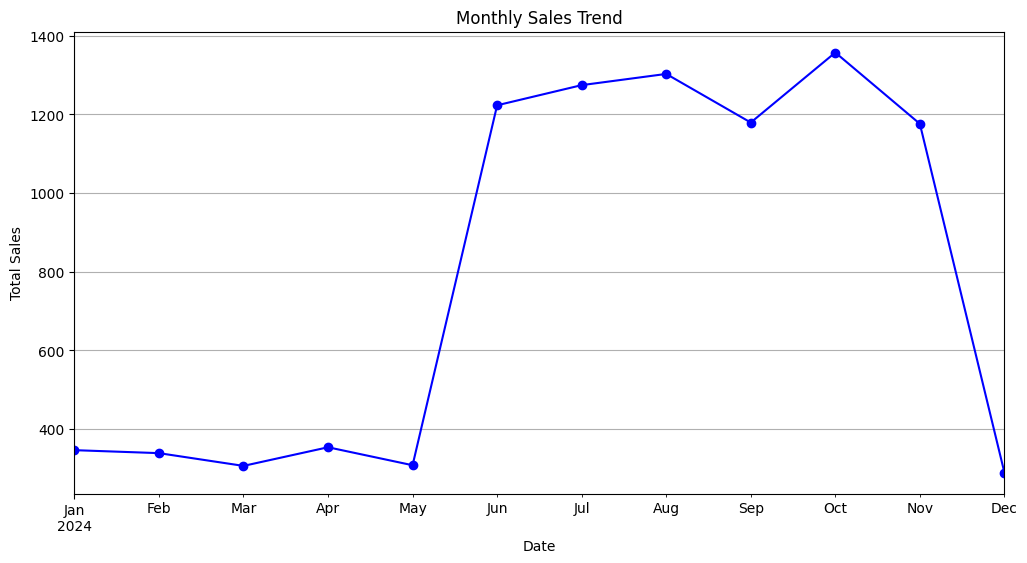

In [12]:
# Plot sales trend
plt.figure(figsize=(12,6))
df_monthly.plot(kind="line", marker="o", color="b")
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid()
plt.show()

# Best-Selling Products

In [13]:
# Aggregate sales by product
top_products = df.groupby("Item")["Amount"].sum().sort_values(ascending=False)
top_products

Item
Banana    1278.99
Butter    1233.89
Bread     1220.56
Eggs      1196.24
Orange    1171.85
Milk      1168.16
Cheese    1107.81
Apple     1079.49
Name: Amount, dtype: float64

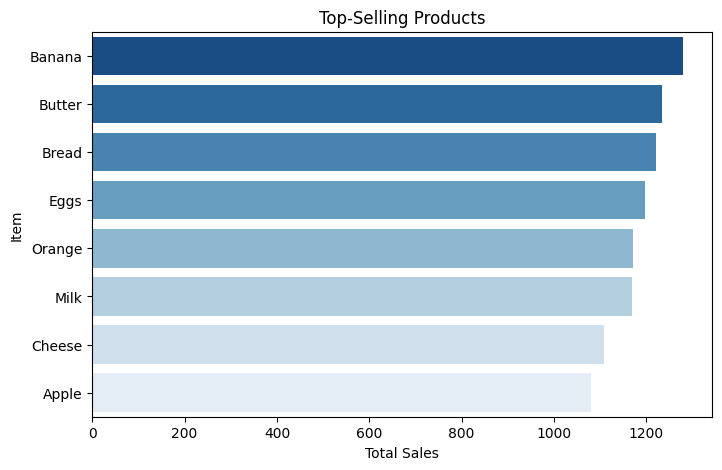

In [14]:
# Plot Top Products
plt.figure(figsize=(8,5))
sns.barplot(x=top_products.values, y=top_products.index, palette="Blues_r")
plt.title("Top-Selling Products")
plt.xlabel("Total Sales")
plt.show()

In [15]:
# Aggregate Quantity soled by product
Quantity_products = df.groupby("Item")["Item"].count().sort_values(ascending=False)
Quantity_products

Item
Banana    124
Bread     124
Apple     113
Orange    113
Milk      112
Butter    111
Eggs      110
Cheese    108
Name: Item, dtype: int64

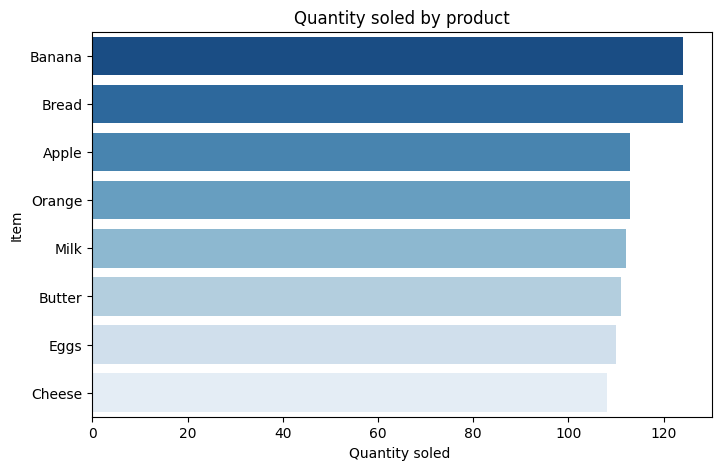

In [16]:
# Plot Quantity soled by product
plt.figure(figsize=(8,5))
sns.barplot(x=Quantity_products.values, y=Quantity_products.index, palette="Blues_r")
plt.title("Quantity soled by product")
plt.xlabel("Quantity soled ")
plt.show()

# Top Store by total sales

In [17]:
#the Total Sales by Store Location
Top_Store = df.groupby(['Store Location'])['Amount'].sum().sort_values(ascending=False)
Top_Store

Store Location
Los Angeles      2474.25
New York         1839.59
Houston          1802.23
San Francisco    1711.29
Chicago          1629.63
Name: Amount, dtype: float64

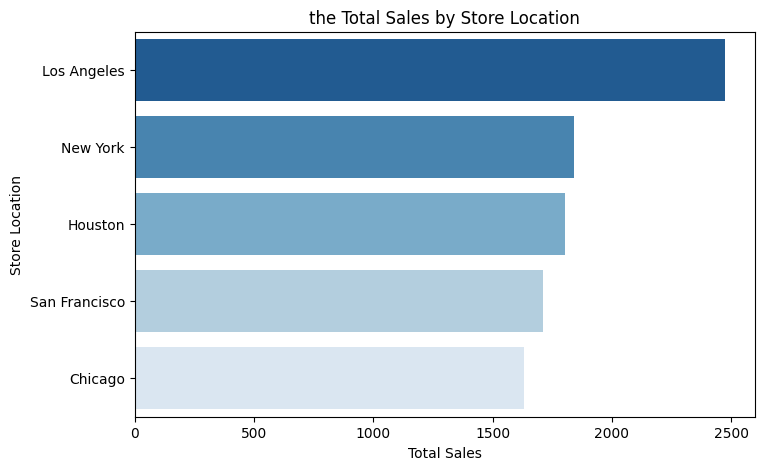

In [18]:
#plot the Total Sales by Store Location
plt.figure(figsize=(8,5))
sns.barplot(x=Top_Store.values, y=Top_Store.index, palette="Blues_r")
plt.title("the Total Sales by Store Location")
plt.xlabel("Total Sales")
plt.show()

# Sales Forecasting

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [20]:
# Aggregate sales per month
df_monthly = df.groupby(df["Date"].dt.to_period("M"))["Amount"].sum().reset_index()
df_monthly["Date"] = df_monthly["Date"].astype(str)  # Convert period to string
df_monthly["Date"] = pd.to_datetime(df_monthly["Date"])  # Convert back to datetime

# Create time index
df_monthly["Month_Index"] = np.arange(len(df_monthly))

MAE: 699.13
RMSE: 910.40


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


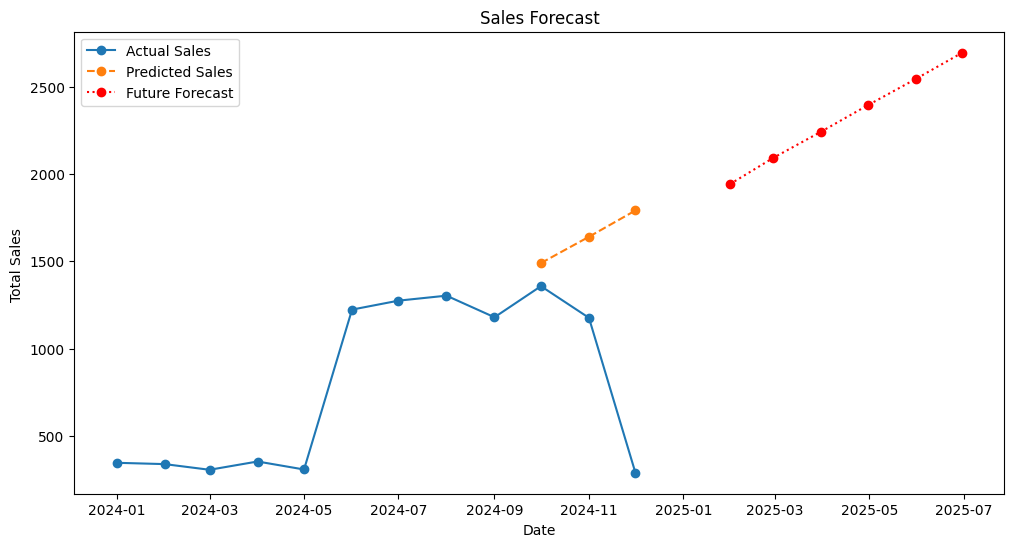

In [21]:
# Split into train and test sets
train_size = int(len(df_monthly) * 0.8)
train, test = df_monthly.iloc[:train_size], df_monthly.iloc[train_size:]

# Features & target
X_train, y_train = train[["Month_Index"]], train["Amount"]
X_test, y_test = test[["Month_Index"]], test["Amount"]

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict future sales
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

# Predict next 6 months
future_index = np.arange(len(df_monthly), len(df_monthly) + 6).reshape(-1, 1)
future_sales = model.predict(future_index)

# Create future dates
future_dates = pd.date_range(df_monthly["Date"].max(), periods=7, freq="M")[1:]

# Plot results
plt.figure(figsize=(12,6))
plt.plot(df_monthly["Date"], df_monthly["Amount"], label="Actual Sales", marker="o")
plt.plot(test["Date"], y_pred, label="Predicted Sales", linestyle="dashed", marker="o")
plt.plot(future_dates, future_sales, label="Future Forecast", linestyle="dotted", marker="o", color="red")
plt.xlabel("Date")
plt.ylabel("Total Sales ")
plt.title("Sales Forecast")
plt.legend()
plt.show()